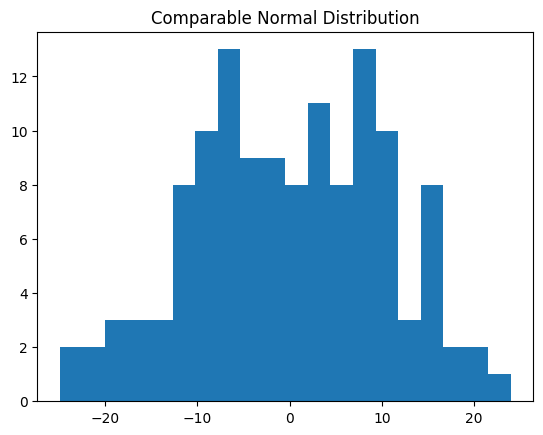

In [1]:
# Generate graph of normal dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Z_LAYER_SIZE = 128

real_dist = 10 * np.random.randn(1, Z_LAYER_SIZE)
plt.hist(real_dist[0], bins=20)
plt.title("Comparable Normal Distribution")
plt.show()

[(0, (0, 1)), (1, (0, 1)), (2, (0, 1)), (3, (0, 1)), (4, (0, 1)), (5, (0, 1)), (6, (0, 1)), (7, (0, 1)), (8, (0, 1)), (9, (0, 1)), (10, (0, 1)), (11, (0, 1)), (12, (0, 1)), (13, (0, 1)), (14, (0, 1)), (15, (0, 1)), (16, (1, 0)), (17, (1, 0)), (18, (1, 0)), (19, (1, 0)), (20, (1, 0)), (21, (1, 0)), (22, (1, 0)), (23, (1, 0)), (24, (1, 0)), (25, (1, 0)), (26, (1, 0)), (27, (1, 0)), (28, (1, 0))]


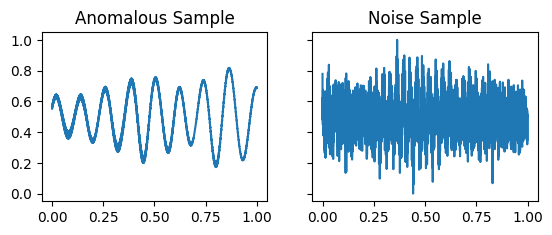

In [5]:
# Display different signals
from pickle import load

x_tests, y_tests = load(open("data/test_4096_1.pickle", "rb"))
x_train = load(open("data/train_4096_1.pickle", "rb"))

fig, ax = plt.subplots(nrows=1, ncols=2, sharey="row")

print(list(enumerate(y_tests[0]))) # Why do some of these look so weird 8, 
ax[0].plot([i/4096 for i in range(4096)], x_tests[0][10])
ax[0].set_title("Anomalous Sample")
ax[0].set_aspect(.75)

ax[1].plot([i/4096 for i in range(4096)], x_tests[0][24])
ax[1].set_title("Noise Sample")
ax[1].set_aspect(.75)

fig.show()

/home/ian/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ian/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


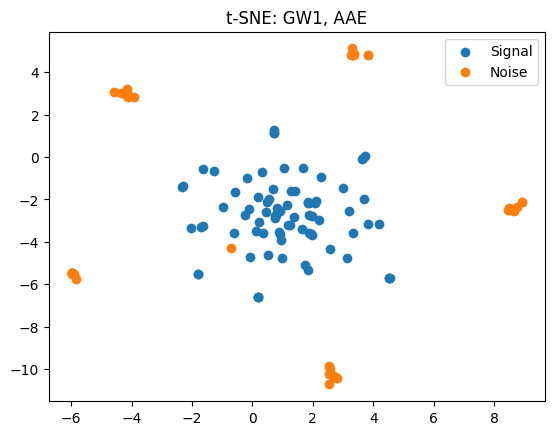

In [2]:
# T-SNE Graph
from sklearn.manifold import TSNE

t_sne = TSNE()

folds = [
    "20230323000640",
    "20230323001052",
    "20230323001229",
    "20230323001636",
    "20230323001814",
    "20230323002224",
    "20230323002401",
    "20230323002813",
    "20230323002951",
    "20230323003404"
][::2]

pos_splits, neg_splits = [], []

for f in folds:
    split = pd.read_pickle("z_layers/%s.pickle.gzip" % f).values.tolist()
    split = [(d[2:], d[0]) for d in split]
    pos_splits += [s[0] for s in split if s[1] == 1]
    neg_splits += [s[0] for s in split if s[1] == 0]

splits = t_sne.fit_transform(pos_splits + neg_splits)

pos_splits = splits[:len(pos_splits)]
neg_splits = splits[len(pos_splits):]

plt.scatter([v[0] for v in pos_splits], [v[1] for v in pos_splits], label="Signal")
plt.scatter([v[0] for v in neg_splits], [v[1] for v in neg_splits], label="Noise")
plt.legend()
plt.title("t-SNE: GW1, AAE")
plt.savefig("tsne.svg")
plt.show()